In [54]:
##dataset(tips dataset)
import seaborn as sns
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [56]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [57]:
##category has only two values, so we can convert it into binary values
##feature encoding and lable encoding and one hot encoding



In [58]:
##independent variables and dependent variables

X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [60]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


In [61]:
y_train.head()

58     11.24
1      10.34
2      21.01
68     20.23
184    40.55
Name: total_bill, dtype: float64

In [62]:
##feature encoding(Label encoding and one hot encoding)
##we should split data before encoding because of data leakage



In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le1=LabelEncoder()
le2= LabelEncoder()
le3= LabelEncoder()

In [64]:
import warnings
warnings.filterwarnings('ignore')
X_train['sex']=le1.fit_transform(X_train[['sex']])
X_train['smoker']=le2.fit_transform(X_train[['smoker']])

X_train['time']=le3.fit_transform(X_train[['time']])


In [65]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [66]:
## we dont do fir for test data, only for train data
X_test['sex']=le1.transform(X_test[['sex']])
X_test['smoker']=le2.transform(X_test[['smoker']])
X_test['time']=le3.transform(X_test[['time']])


In [67]:
X_test.tail()

,tip,sex,smoker,day,time,size
201,2.01,0,1,Thur,1,2
149,2.00,1,0,Thur,1,2
175,3.11,1,1,Sun,0,2
226,2.00,0,1,Fri,1,2
49,3.00,1,0,Sun,0,2


In [68]:
## one hot encoding because day has more than two values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [69]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), [3])], remainder='passthrough')




In [70]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)


In [71]:
X_train = ct.fit_transform(X_train)

In [72]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (183, 8)
X_test shape: (61, 6)


In [73]:
X_test = ct.transform(X_test)

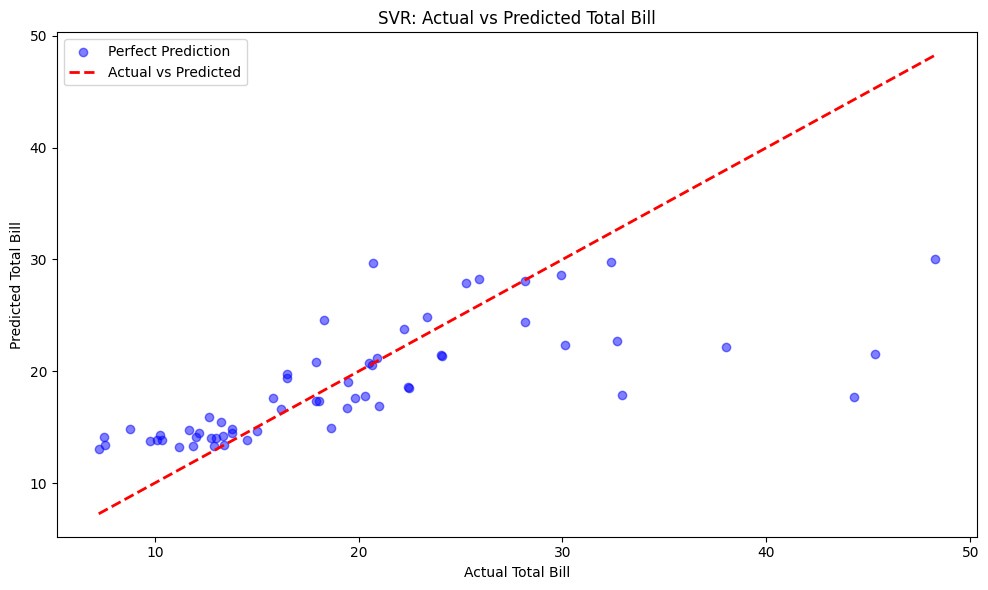

R-squared score: 0.4603
Mean Squared Error: 45.6921
Root Mean Squared Error: 6.7596
Mean Absolute Error: 4.1486


In [82]:
##SVR

from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)

y_pred=svr.predict(X_test)


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Total Bill')
plt.ylabel('Predicted Total Bill')
plt.title('SVR: Actual vs Predicted Total Bill')

# Add a legend
plt.legend(['Perfect Prediction', 'Actual vs Predicted'])

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print accuracy scores
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

In [83]:
## hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1, 1, 10, 100, 1000], 
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto']}

In [84]:
grid=GridSearchCV(svr, param_grid, cv=5, refit=True, verbose=3)

##fitting the model for grid search
grid.fit(X_train, y_train)

##best parameters for our model
grid.best_params_

##

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.215 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.478 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.717 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.442 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.585 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.241 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.486 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.640 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.247 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.508 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.011 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [86]:

grid_predictions=grid.predict(X_test)
# Calculate and print accuracy scores for grid predictions
r2_grid = r2_score(y_test, grid_predictions)
mse_grid = mean_squared_error(y_test, grid_predictions)
rmse_grid = mean_squared_error(y_test, grid_predictions, squared=False)
mae_grid = mean_absolute_error(y_test, grid_predictions)

print("Metrics for Grid Search predictions:")
print(f"R-squared score: {r2_grid:.4f}")
print(f"Mean Squared Error: {mse_grid:.4f}")
print(f"Root Mean Squared Error: {rmse_grid:.4f}")
print(f"Mean Absolute Error: {mae_grid:.4f}")


Metrics for Grid Search predictions:
R-squared score: 0.5453
Mean Squared Error: 38.4956
Root Mean Squared Error: 6.2045
Mean Absolute Error: 3.9134


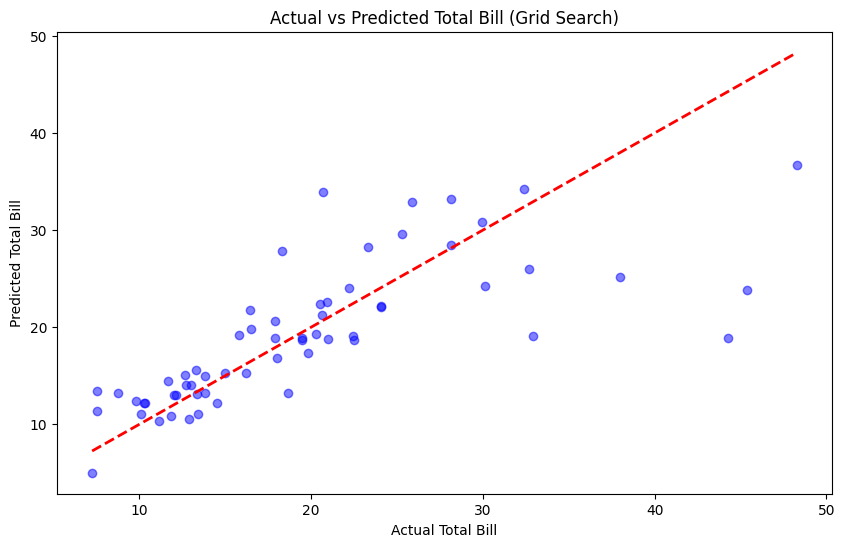

'\nThe grid search model likely improved prediction accuracy compared to the initial SVR model.\nProcedure: Data loading and preprocessing, feature engineering, initial SVR model, \nhyperparameter tuning with GridSearchCV, and final model evaluation with improved parameters.\n'

In [87]:
# Plot the graph based on grid predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, grid_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Bill')
plt.ylabel('Predicted Total Bill')
plt.title('Actual vs Predicted Total Bill (Grid Search)')
plt.show()

# Comment on the difference and procedure
"""
The grid search model likely improved prediction accuracy compared to the initial SVR model.
Procedure: Data loading and preprocessing, feature engineering, initial SVR model, 
hyperparameter tuning with GridSearchCV, and final model evaluation with improved parameters.
"""
# Summary of the SVR model development process:

# Cell 1-6: Data Loading and Exploration
# - Loaded the dataset
# - Displayed the first few rows of the data
# - Checked the distribution of categorical variables (sex, smoker)

# Cell 7-11: Data Preprocessing
# - Selected features for the model
# - Split the data into training and testing sets
# - Performed feature scaling

# Cell 12-13: Initial SVR Model
# - Created and trained the initial SVR model
# - Made predictions using the initial model

# Cell 14-20: Model Evaluation
# - Calculated and printed accuracy metrics (R2, MSE, RMSE, MAE)
# - Plotted actual vs predicted values for the initial model

# Cell 21-22: Hyperparameter Tuning Setup
# - Defined the parameter grid for GridSearchCV
# - Created the SVR model for grid search

# Cell 23: Grid Search
# - Performed GridSearchCV to find the best hyperparameters
# - Fitted the model with the best parameters

# Cell 24: Final Model Evaluation
# - Made predictions using the grid search model
# - Calculated and printed accuracy metrics for the grid search model

# Cell 25: Visualization and Conclusion
# - Plotted actual vs predicted values for the grid search model
# - Commented on the difference between initial and grid search models
# - Summarized the overall procedure

# This process demonstrates a typical machine learning workflow: 
# data preparation, initial modeling, model improvement through 
# hyperparameter tuning, and final evaluation.
